In [1]:
# groupby
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
tdf = titanic_df.copy() 
tdf.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [4]:
tdf.groupby('sex')

In [3]:
# male과 female두개를 나눠서 카운트해보기 
tdf.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [5]:
# apply함수써서 해보기
tdf.groupby('sex').apply(lambda x:x.count())[['survived']]

,survived
sex,
female,314
male,577


In [6]:
tdf.groupby('sex').count()[['survived']]

,survived
sex,
female,314
male,577


In [7]:
# Q. sibsp, parch 컬럼의 각 원소에 1을 추가해 주세요.
tdf_el = tdf[['parch','sibsp']].apply(lambda x : x+1)
tdf_el.head()

,parch,sibsp
0,1,2
1,1,2
2,1,1
3,1,2
4,1,1


In [8]:
def uppercase(x):
    return x.upper()
tdf.sex.apply(uppercase)[0:3] #시리즈임, 인덱싱함

0      MALE
1    FEMALE
2    FEMALE
Name: sex, dtype: object

In [9]:
tdf.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
tdf.embark_town.isnull().sum()

In [11]:
# Q. embark_town 열의 NaN 값을 바로 앞에 있는 값으로 변경하세요.
tdf.embark_town.fillna(method='ffill',inplace=True) #829
tdf.embark_town

# method='ffill' 는 결측값 직전의 값으로 채우는 것. bfill는 결측값 뒤의 값으로 채우는 것
# reindex도 됨, https://rfriend.tistory.com/tag/method=%27ffill%27

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [10]:
# Q. 'age'컬럼을 범주화하여 새로운 'age_class'컬럼을 생성하세요. null값은 별도로 처리하기

def agegroup(x):
    cat = ''
    if x < 10:
        cat = 'child'
    elif x < 25:
        cat = 'young'
    elif x < 40:
        cat = 'adult'
    elif x < 60:
        cat = 'senior'
    else :
        cat ='old'
    return cat

age_class = tdf.age.apply(lambda x:agegroup(x))
tdf['age_class'] = age_class  #age_class라는 칼럼을 앞에서 만든 age_class로 넣어주는것
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


In [ ]:
tdf.age_class.value_counts()


In [ ]:
# Q. 'survived','pclass','sex' 컬럼으로 데이터프레임 df1을 생성하세요 
df1 = tdf[['survived','pclass','sex']]
df1.head()

In [ ]:
# Q. df1에서 pclass가 3인 승객의 개수를 구하세요.
df1.pclass.value_counts()

In [ ]:
df1.pclass.value_counts()[3]

In [ ]:
len(df1.query('pclass==3'))

In [ ]:
len(list(filter(lambda x:x==3, df1.pclass)))

In [ ]:
import pandas as pd
fifa = pd.read_csv('dataset/FIFA.csv',encoding='cp949') #'utf-8'을 못읽어서
fifa.head()

kaggel 알아보기

In [ ]:
fifa.shape

In [ ]:
# height의 값을 cm로 변환하여 새로운 컬럼 'height_cm'을 생성하세요.
def ht_ex(x):
    f, i = map(int, x.split("'"))
    return f*30.48 + i*2.54
fifa['Height_cm'] = fifa['Height'].apply(ht_ex)
fifa.head()

In [ ]:
def ftinch_to_cm(ftinch):
    ftinchlist = ftinch.split("'")
    ft = int(ftinchlist[0])
    inch = int(ftinchlist[1])
    ftcm=ft*30.48
    incm = inch*2.54
    total = ftcm + incm
    return total


fifa['Height_cm']=fifa.Height.apply(lambda x:ftinch_to_cm(x))
fifa.head()


In [ ]:
fifa.info()

## 판다스 입출력 추가 내용

In [3]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [4]:
# JSON 포맷 데이터를 Python 객체로 읽기, 역직렬화, 디코딩: json.loads()
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [5]:
# Python 객체를 JSON 데이터로 쓰기, 직렬화, 인코딩: json.dumps()
asjson = json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

In [1]:
!pip install lxml

In [13]:
# html을 데이터프레임으로 불러오기
import pandas as pd
tables = pd.read_html('dataset/fdic_failed_bank_list.html')
len(tables)
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [18]:
# XML 파싱하기
from lxml import objectify

path = '/User/joy/cakd3/dataset/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

FileNotFoundError: [Errno 2] No such file or directory: '/User/joy/cakd3/dataset/mta_perf/Performance_MNR.xml'

In [9]:
from lxml import objectify

path = 'dataset/fdic_failed_bank_list.html'
parsed = objectify.parse(open(path))
root = parsed.getroot()

XMLSyntaxError: Opening and ending tag mismatch: link line 16 and head, line 20, column 8 (fdic_failed_bank_list.html, line 20)

In [10]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)


NameError: name 'root' is not defined

참고 https://lxml.de/tutorial.html

7/16강의

In [19]:
import pandas as pd
import numpy as np
arr = np.array([1,2,1,2,2,3,3,3])
data = arr.reshape(4,2)
df = pd.DataFrame(data,columns=['a','b'])
df

,a,b
0,1,2
1,1,2
2,2,3
3,3,3


In [20]:
df1 = df.copy()
df1.drop_duplicates()

,a,b
0,1,2
2,2,3
3,3,3


In [4]:
df2 = df.copy()
df2.drop_duplicates(subset=['b']) #subset 찾아보기 얘는 특정 칼럼을 기준으로 제거해주는 것

,a,b
0,1,2
2,2,3


In [5]:
df3=df.copy()
df3.drop_duplicates(subset='b',keep='last')  #앞에거는 없애고 뒤에거 남기고싶다

,a,b
1,1,2
3,3,3


In [38]:
#칼럼 이름 변경 여기서 sex를 male은 0, female은 1로 입력해보기 replace로
import seaborn as sns
titanic = sns.load_dataset('titanic')  #load_dataset알아보기
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
a = titanic.sex.replace({'male':0,'female':1})
dfdf = pd.DataFrame(a)
dfdf.head()

,sex
0,0
1,1
2,1
3,1
4,0


In [40]:
# 열의 이름 변경 : sex->gendr, age->age_cat
titanic.rename(columns = {'sex':'gender','age':'age_cat','class':'c_level'}, inplace=True)
titanic.head()

,survived,pclass,gender,age_cat,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# 칼럼이름 다 대문자로 바꾸기
titanic.rename(columns=str.lower,inplace=True) #upper
titanic

,survived,pclass,gender,age_cat,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
titanic.rename(str.lower, axis='columns').head(3)
# titanic.rename(str.lower, axis='colunms').head(3)

,survived,pclass,gender,age_cat,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [43]:
# 컬럼 선택 : 'survived','pclass','gender','age_cat
titanic = titanic[['survived','pclass','gender','c_level']]
titanic.head()

,survived,pclass,gender,c_level
0,0,3,male,Third
1,1,1,female,First
2,1,3,female,Third
3,1,1,female,First
4,0,3,male,Third


In [44]:
# 컬럼 다 소문자로 바꾸기
titanic.rename(columns=str.lower, inplace=True)
titanic

,survived,pclass,gender,c_level
0,0,3,male,Third
1,1,1,female,First
2,1,3,female,Third
3,1,1,female,First
4,0,3,male,Third
...,...,...,...,...
886,0,2,male,Second
887,1,1,female,First
888,0,3,female,Third
889,1,1,male,First


In [45]:
# 컬럼 순서 변경 : 'pclass','gender','age_cat','survived'
new_order = ['pclass','gender','c_level','survived']

df = titanic[new_order]
df.head()

,pclass,gender,c_level,survived
0,3,male,Third,0
1,1,female,First,1
2,3,female,Third,1
3,1,female,First,1
4,3,male,Third,0


In [46]:
# gender에서 다시 0은 male, 1은 female로 바꿔보기
df[['gender']].replace([1,0],['female','male'])
# df.gender.replace({1:'female',0:'male'},inplace=True)  얘로 쓰려면 warnings없애야함
# import warnings ; warnings.filterwarnings('ignore');
df.head()

,pclass,gender,c_level,survived
0,3,male,Third,0
1,1,female,First,1
2,3,female,Third,1
3,1,female,First,1
4,3,male,Third,0


In [47]:
# 인코딩 - LabelEncoder : values의 갯수대로 숫자로 바꿔줌 남/여로 나뉘어있으면 0,1 / A,B,C반이면 0,1,2로 바꿔줌
import warnings; warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['gender','c_level']

for feature in features:
    df[feature]=le.fit_transform(df[feature])  #fit이 뭔지 찾아봐야함 알고리즘할 때도 함..이 라인은 인코딩하는것
df.head()


,pclass,gender,c_level,survived
0,3,1,2,0
1,1,0,0,1
2,3,0,2,1
3,1,0,0,1
4,3,1,2,0


In [48]:
df.gender.value_counts()

1    577
0    314
Name: gender, dtype: int64

In [49]:
df.c_level.value_counts()

2    491
0    216
1    184
Name: c_level, dtype: int64

In [58]:
df = titanic[['gender','c_level']]
df1 = df.copy()
df1.rename(columns={'c_level':'c_level'}, inplace=True)
df1.head()

,gender,c_level
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [59]:
# 인코딩 - OneHotEncoder : gender항목에 여/남이 있으면 gender_f, gender_m 이런식으로 나눠서 칼럼을 만들어줌
# 즉 텍스트를 벡터화함 그러나 칼럼이 엄청 많아진다. 과대적합 과소적합 찾아보기
pd.get_dummies(df1).head()

,gender_female,gender_male,c_level_First,c_level_Second,c_level_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


In [108]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
boston.target
boston.DESCR  #데이터셋에대한 설명
boston.feature_names #칼럼이름들
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target']=boston.target  #맨끝에 들어감, 
#넣어주는 이유는 기존의 boston.data는 독립변순데 target이 종속변수라 데이터프레임이 완성되기 때문
df_boston.head()
# boston.feature_names

# 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
#        'TAX', 'PTRATIO', 'B', 'LSTAT']

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [97]:
df_boston.drop('target', axis=1, inplace=True)

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_boston['RM']=scaler.fit_transform(df_boston[['RM']])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.577505,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.547998,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,0.694386,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,0.658555,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,0.687105,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [98]:
# 다 정규화해보기 연습
df_boston = scaler.fit_transform(df_boston)
df_boston = pd.DataFrame(df_boston, columns=boston.feature_names)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [78]:
df_boston.RM.mean()

0.5218690146295801

In [99]:
from sklearn.preprocessing import StandardScaler  #표준화
scaler = StandardScaler()
df_boston['INDUS'] = scaler.fit_transform(df_boston[['INDUS']])
df_boston.head() 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,-1.287909,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,-0.593381,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,-0.593381,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,-1.306878,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,-1.306878,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [105]:
df_boston.INDUS.mean()  #4의 -17제곱만큼 잇는것
df_boston.INDUS.std()  #표준편차

1.0009896093465716

In [101]:
# 전체 표준화 해보기
df_boston = scaler.fit_transform(df_boston)
df_boston = pd.DataFrame(df_boston, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


<AxesSubplot:ylabel='Density'>

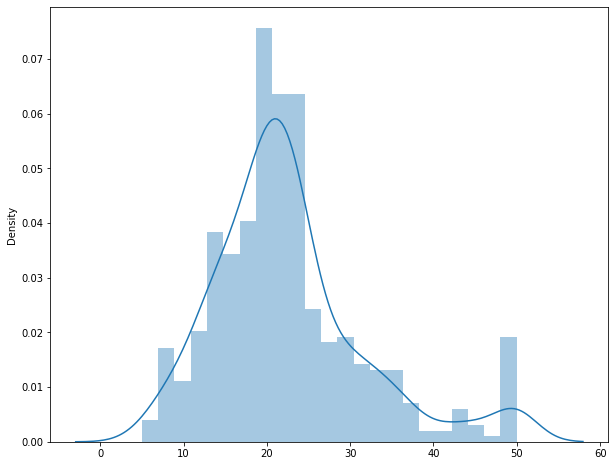

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.distplot(df_boston[['target']])

<AxesSubplot:ylabel='Density'>

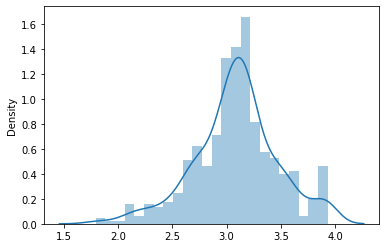

In [110]:
# 로그 변환
import numpy as np
df_boston['target'] = np.log1p(df_boston[['target']])
sns.distplot(df_boston[['target']])

In [111]:
# 로그 변환 환원
df_boston['target'] = np.expm1(df_boston[['target']])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


7/19 그룹연산 
- 그룹객체 만들기(분할)
- 그룹연산메소드(적용-결합)

In [23]:
import pandas as pd
import seaborn as sns
titanic =sns.load_dataset('titanic')
df=titanic.loc[:,['age','sex','class','fare','survived']]
# df=titanic[['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [24]:
# df.class는 예약어 처리가 되기 때문에 df['class']로 처리 따라서 이름 바꿔야
# 아니면 예약어를 다른 이름으로 변경하는 방법도 있다. 
# 방법1 data = df['class'].value_counts

df = titanic.copy()

import warnings
warnings.filterwarnings('ignore')

df.rename(columns = {'class' : 'c_level'},inplace=True)

df.c_level.value_counts()

Third     491
First     216
Second    184
Name: c_level, dtype: int64

In [25]:
data = df['c_level']
data.value_counts()

Third     491
First     216
Second    184
Name: c_level, dtype: int64

In [26]:
# 파이썬 예약어
import keyword
print(keyword.kwlist)

['False', 'None', 'True', '__peg_parser__', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [27]:
len(df)
grouped = df.groupby(['c_level'])   #class기준으로 세 개로 나눠준 것
print(grouped)

In [28]:
list(grouped) #first, second, third 별로 데이터가 나옴

[('First',
       survived  pclass     sex   age  sibsp  parch     fare embarked c_level  \
  1           1       1  female  38.0      1      0  71.2833        C   First   
  3           1       1  female  35.0      1      0  53.1000        S   First   
  6           0       1    male  54.0      0      0  51.8625        S   First   
  11          1       1  female  58.0      0      0  26.5500        S   First   
  23          1       1    male  28.0      0      0  35.5000        S   First   
  ..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
  871         1       1  female  47.0      1      1  52.5542        S   First   
  872         0       1    male  33.0      0      0   5.0000        S   First   
  879         1       1  female  56.0      0      1  83.1583        C   First   
  887         1       1  female  19.0      0      0  30.0000        S   First   
  889         1       1    male  26.0      0      0  30.0000        C   First   
  
         who  

In [29]:
for key, group in grouped :
    print('* key : ', key)
    print('* number : ', len(group))
    print(group.head(), '\n')

* key :  First
* number :  216
    survived  pclass     sex   age  sibsp  parch     fare embarked c_level  \
1          1       1  female  38.0      1      0  71.2833        C   First   
3          1       1  female  35.0      1      0  53.1000        S   First   
6          0       1    male  54.0      0      0  51.8625        S   First   
11         1       1  female  58.0      0      0  26.5500        S   First   
23         1       1    male  28.0      0      0  35.5000        S   First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
11  woman       False    C  Southampton   yes   True  
23    man        True    A  Southampton   yes   True   

* key :  Second
* number :  184
    survived  pclass     sex   age  sibsp  parch     fare embarked c_level  \
9          1       2  female  14.0      1      0  30.0708 

In [30]:
# 연산 - 평균
average = grouped.mean()  #그룹별로 각 컬럼에 대한 평균 구함.
print(average)

         survived  pclass        age     sibsp     parch       fare  \
c_level                                                               
First    0.629630     1.0  38.233441  0.416667  0.356481  84.154687   
Second   0.472826     2.0  29.877630  0.402174  0.380435  20.662183   
Third    0.242363     3.0  25.140620  0.615071  0.393075  13.675550   

         adult_male     alone  
c_level                        
First      0.550926  0.504630  
Second     0.538043  0.565217  
Third      0.649695  0.659878  


In [31]:
max_g = grouped.max()
max_g

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alive,alone
c_level,,,,,,,,,,,
First,1,1,male,80.0,3,4,512.3292,woman,True,yes,True
Second,1,2,male,70.0,3,3,73.5000,woman,True,yes,True
Third,1,3,male,74.0,8,6,69.5500,woman,True,yes,True


In [32]:
# Third그룹만을 선택해서 gruop3 이름으로 저장하고 통계요약표(describe)를 출력하세요.
li = list(grouped)
li[2][1].describe()

,survived,pclass,age,sibsp,parch,fare
count,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [33]:
a = grouped.groups['Third']
group3 = df.loc[a]
group3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [35]:
group3=grouped.get_group('Third')
group3.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [96]:
# first 그룹과 비교해보기
group1=grouped.get_group('First')
group1.describe()

,survived,pclass,age,sibsp,parch,fare
count,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [98]:
# Q.class 열, sex열을 기준으로 분할하여 grouped_two에 저장하세요.
grouped_two=df.groupby(['c_level','sex'])
grouped_two.describe()

survived                                              pclass  \
                  count      mean       std  min  25%  50%  75%  max  count   
c_level sex                                                                   
First   female     94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0   94.0   
        male      122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  122.0   
Second  female     76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0   76.0   
        male      108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0  108.0   
Third   female    144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  144.0   
        male      347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0  347.0   

                               ... parch                  fare              \
               mean  std  min  ...   25%  50%  75%  max  count        mean   
c_level sex                    ...                                           
First   female  1.0  0.0  1.0  ...   0.0  0.0  1.0  2.0   94.0  106.125798   
        male    1.0  0.0  1.0  ...   0.0  0.0  0.0  4.0  122.0   67.226127   
Second  female  2.0  0.0  2.0  ...   0.0  0.0  1.0  3.0   76.0   21.970121   
        male    2.0  0.0  2.0  ...   0.0  0.0  0.0  2.0  108.0   19.741782   
Third   female  3.0  0.0  3.0  ...   0.0  0.0  1.0  6.0  144.0   16.118810   
        male    3.0  0.0  3.0  ...   0.0  0.0  0.0  5.0  347.0   12.661633   

                                                                              
                      std      min       25%       50%         75%       max  
c_level sex                                                                   
First   female  74.259988  25.9292  57.24480  82.66455  134.500000  512.3292  
        male    77.548021   0.0000  27.72810  41.26250   78.459375  512.3292  
Second  female  10.891796  10.5000  13.00000  22.00000   26.062500   65.0000  
        male    14.922235   0.0000  12.33125  13.00000   26.000000   73.5000  
Third   female  11.690314   6.7500   7.85420  12.47500   20.221875   69.5500  
        male    11.681696   0.0000   7.75000   7.92500   10.008300   69.5500  

[6 rows x 48 columns]

In [99]:
# Q. grouped_two 그룹 객체를 for문을 사용해서 iteration으로 출력하세요

for key, group in grouped_two:
    print(key)
    print(len(group))
    print(grouped_two.head(),'\n')

('First', 'female')
94
    survived  pclass     sex   age  sibsp  parch      fare embarked c_level  \
0          0       3    male  22.0      1      0    7.2500        S   Third   
1          1       1  female  38.0      1      0   71.2833        C   First   
2          1       3  female  26.0      0      0    7.9250        S   Third   
3          1       1  female  35.0      1      0   53.1000        S   First   
4          0       3    male  35.0      0      0    8.0500        S   Third   
5          0       3    male   NaN      0      0    8.4583        Q   Third   
6          0       1    male  54.0      0      0   51.8625        S   First   
7          0       3    male   2.0      3      1   21.0750        S   Third   
8          1       3  female  27.0      0      2   11.1333        S   Third   
9          1       2  female  14.0      1      0   30.0708        C  Second   
10         1       3  female   4.0      1      1   16.7000        S   Third   
11         1       1  female 

In [100]:
# Q. gruoped_two 그룹 객체에 연산 메소드 적용, 각 그룹의 평균값을 구한 후 출력하세요.

average_two = grouped_two.mean()
average_two

# 여성일수록, class가 높을수록 생존확률이 높다. 

survived  pclass        age     sibsp     parch        fare  \
c_level sex                                                                   
First   female  0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
        male    0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
Second  female  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
        male    0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
Third   female  0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
        male    0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

                adult_male     alone  
c_level sex                           
First   female    0.000000  0.361702  
        male      0.975410  0.614754  
Second  female    0.000000  0.421053  
        male      0.916667  0.666667  
Third   female    0.000000  0.416667  
        male      0.919308  0.760807

In [101]:
# Q.gruoped_two 그룹 객체에서 ('Third', female) 그룹을 선택해서 group3f에 저장하고 처음 5개행을 출력하세요

a = grouped_two.get_group(('Third', 'female'))
a.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


#### 적용-결합
데이터 집계 (aggregation agg)
- 집계 연산을 처리하는 사용자 정의 함수를 그룹 객체에 적용하려면 agg() 메서드 사용.
- 모든 열에 여러 함수를 매핑: group 객체 . agg ([함수1.함수2...])
- 각 열마다 다른 함수를 매핑: group 객체 . agg ({'열1':함수1,...})

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group 객체. transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter()메서드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링: group 객체. filter(조건함수식)

객체에 함수 매핑(apply)
- 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group 객체 . apply(매핑함수)

In [103]:
# Q.최대값-최소값을 반환하는 사용자함수를 정의하고 agg()함수에 인수로 전달하여 그룹별로 집계하여 agg_minmax 이름으로 저장후 출력

import seaborn as sns
titanic_df = sns.load_dataset('titanic')

# class 열을 기준으로 분할
grouped=df.groupby(['c_level'])


def minmax(x):
    return x.max()-x.min()

agg_minmax = grouped.agg(minmax)
agg_minmax


,survived,pclass,age,sibsp,parch,fare
c_level,,,,,,
First,1,0,79.08,3,4,512.3292
Second,1,0,69.33,3,3,73.5000
Third,1,0,73.58,8,6,69.5500


In [104]:
# 모든열에 여러 함수를 매핑: gruop객체.agg([함수1,함수2,...])
# 각 열마다 다른 함수 매핑 : group객체.agg({'열1':함수1, '열2':함수2})
agg1 = grouped.agg({'age':min,'fare':max})
agg1

,age,fare
c_level,,
First,0.92,512.3292
Second,0.67,73.5000
Third,0.42,69.5500


In [105]:
agg2 = grouped.agg(['min','max'])
agg2

survived     pclass         sex         age       sibsp     parch      \
             min max    min max     min   max   min   max   min max   min max   
c_level                                                                         
First          0   1      1   1  female  male  0.92  80.0     0   3     0   4   
Second         0   1      2   2  female  male  0.67  70.0     0   3     0   3   
Third          0   1      3   3  female  male  0.42  74.0     0   8     0   6   

        fare              who        adult_male       alive       alone        
         min       max    min    max        min   max   min  max    min   max  
c_level                                                                        
First    0.0  512.3292  child  woman      False  True    no  yes  False  True  
Second   0.0   73.5000  child  woman      False  True    no  yes  False  True  
Third    0.0   69.5500  child  woman      False  True    no  yes  False  True

In [106]:
# fare는 min,max age는 mean 함수 적용해보기
agg3 = grouped.agg({'fare':['min','max'],'age':'mean'})
agg3

fare                  age
         min       max       mean
c_level                          
First    0.0  512.3292  38.233441
Second   0.0   73.5000  29.877630
Third    0.0   69.5500  25.140620

In [108]:
# Q.데이터 개수가 200개 이상인 그룹만 필터링해 데이터 프레임으로 반환하여 grouped_filter이름으로 저장 후 처dma 5개행 출력

grouped_filter = grouped.filter(lambda x: len(x)>=200)
grouped_filter.head()
grouped_filter['c_level'].value_counts()  #second가 0이 나오는 것은 200이상이라는 그룹에 포함되지않아서 그냥 빠진것.

Third     491
First     216
Second      0
Name: c_level, dtype: int64

In [109]:
# Q.age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter이름으로 저장 후 끝에서 5개행출력

# age_filter = grouped['age'].filter(lambda x: x.mean()<30)  이렇게하면 시리즈로 나옴
age_filter = grouped.filter(lambda x: x.age.mean()<30)
age_filter.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [110]:
# z-score : 평균값에서 표준편차의 몇배 떨어져 있는지를 평가하는 수치 / 표준편차 함수 : .std()

def z_score(x):
    return (x-x.mean()) / x.std()

age_zscore = grouped.age.apply(z_score)  #이때 agg는 안됨 왜 안되는지 찾아보기 / zscore:차이가 표준편차의 몇배냐
age_zscore

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [111]:
age_zscore=grouped.age.transform(z_score)
age_zscore

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [112]:
age_filter=grouped.apply(lambda x : x.age.mean()<30)
for x in age_filter.index:   #first, second, third
    if age_filter[x] == True:  #first,second,third가 true이면 get_group(x)해서 저장해서 나온다는 뜻
        age_filter_df = grouped.get_group(x)
        print(age_filter_df.head())
        print()
    

    survived  pclass     sex   age  sibsp  parch     fare embarked c_level  \
9          1       2  female  14.0      1      0  30.0708        C  Second   
15         1       2  female  55.0      0      0  16.0000        S  Second   
17         1       2    male   NaN      0      0  13.0000        S  Second   
20         0       2    male  35.0      0      0  26.0000        S  Second   
21         1       2    male  34.0      0      0  13.0000        S  Second   

      who  adult_male deck  embark_town alive  alone  
9   child       False  NaN    Cherbourg   yes  False  
15  woman       False  NaN  Southampton   yes   True  
17    man        True  NaN  Southampton   yes   True  
20    man        True  NaN  Southampton    no   True  
21    man        True    D  Southampton   yes   True  

   survived  pclass     sex   age  sibsp  parch     fare embarked c_level  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
2         1       3  female  26.0      0      

In [138]:
age_filter

c_level
First     False
Second     True
Third      True
dtype: bool

 ## 피벗 -> 여기서부터 다시 보기 3시 30분정도부터
- 피벗 테이블을 구성하는 4가지 요소(행인덱스,열인덱스,데이터값,데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [139]:
import pandas as pd
pd.set_option('display.max_columns',24)

data_pv = pd.read_pickle('dataset/data_pv.pkl')
print(data_pv.head())

data_pv1 = data_pv.pivot(index = 'Country', columns='Indicator', values='Value')
data_pv1 =pd.pivot(index = 'Country', columns='Indicator', values='Value')
print()
print(data_pv.shape)
print(data_pv.info())
data_pv1.head()

          Country                           Indicator  Value
0       Australia  Dwellings without basic facilities    1.1
1         Austria  Dwellings without basic facilities    1.0
2         Belgium  Dwellings without basic facilities    2.0
3          Canada  Dwellings without basic facilities    0.2
4  Czech Republic  Dwellings without basic facilities    0.9


TypeError: pivot() missing 1 required positional argument: 'data'

In [114]:
data_pv1.shape

(37, 24)

In [116]:
# Q.Titanic df에서 행은 class, 열은 sex로 구성된 피봇 테이블을 출력하세요.
pdf1 = pd.pivot_table(df,
                     index='c_level',
                     columns='sex',
                     values='age',
                     aggfunc='mean')
pdf1  #나이의 평균값이 values로 나옴

sex,female,male
c_level,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [117]:
# Q. 값에 적용하는 집계 함수를 2개 이상 지정할 수 있다. 'mean','sum'을 지정하여 출력하세요. value='survived'
pdf2=pd.pivot_table(df, 
                   index='c_level',
                   columns='sex',
                   values='survived',
                   aggfunc=['mean','sum'])
pdf2

mean              sum     
sex        female      male female male
c_level                                
First    0.968085  0.368852     91   45
Second   0.921053  0.157407     70   17
Third    0.500000  0.135447     72   47

In [140]:
# Q. 행,열,값에 사용할 열을 2개 이상 지정할 수 있다. index, values, aggfunc에 각각 2개를 지정하여 출력하세요.
index=['c_level','sex'] #행위치에 들어갈 열
columns='survived'#열 위치에 들어갈 열
values=['age','fare'] #데이터로 사용할 열
aggfunc=['mean','max'] #데이터 집계함수
pd3 = pd.pivot_table(df,
                   index=['c_level','sex'],
                   columns=['survived'],
                   values=['age','fare'],
                   aggfunc=['mean','max'])
pd3

mean                                             \
                      age                alone                  fare   
survived                0          1         0         1           0   
c_level sex                                                            
First   female  25.666667  34.939024  0.333333  0.362637  110.604167   
        male    44.581967  36.248000  0.649351  0.555556   62.894910   
Second  female  36.000000  28.080882  0.500000  0.414286   18.250000   
        male    33.369048  16.022000  0.714286  0.411765   19.488965   
Third   female  23.818182  19.329787  0.319444  0.513889   19.773093   
        male    27.255814  22.274211  0.773333  0.680851   12.204469   

                             max                                      
                             age       alone          fare            
survived                 1     0     1     0     1       0         1  
c_level sex                                                           
First   female  105.978159  50.0  63.0  True  True  151.55  512.3292  
        male     74.637320  71.0  80.0  True  True  263.00  512.3292  
Second  female   22.288989  57.0  55.0  True  True   26.00   65.0000  
        male     21.095100  70.0  62.0  True  True   73.50   39.0000  
Third   female   12.464526  48.0  63.0  True  True   69.55   31.3875  
        male     15.579696  74.0  45.0  True  True   69.55   56.4958

In [158]:
# 과제 1
# Q.Titanic 데이터셋에 대한 탐색을 통하여 주요한 그룹 조합별 인사이트 5개 이상을 도출하여 기술하세요.

import pandas as pd
import numpy as np
import seaborn as sns
titanic = sns.load_dataset('titanic')

print(pdf2)


hw = pd.pivot_table(df,
                   index=['c_level','sex'],
                   columns=['survived'],
                   values=['age','fare'],
                   aggfunc=['mean','max','min'])
hw

             mean              sum     
sex        female      male female male
c_level                                
First    0.968085  0.368852     91   45
Second   0.921053  0.157407     70   17
Third    0.500000  0.135447     72   47


mean                                      max        \
                      age                   fare               age         
survived                0          1           0           1     0     1   
c_level sex                                                                
First   female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
        male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second  female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
        male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third   female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
        male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                   min                           
                  fare             age            fare           
survived             0         1     0      1        0        1  
c_level sex                                                      
First   female  151.55  512.3292   2.0  14.00  28.7125  25.9292  
        male    263.00  512.3292  18.0   0.92   0.0000  26.2875  
Second  female   26.00   65.0000  24.0   2.00  10.5000  10.5000  
        male     73.50   39.0000  16.0   0.67   0.0000  10.5000  
Third   female   69.55   31.3875   2.0   0.75   6.7500   7.2250  
        male     69.55   56.4958   1.0   0.42   0.0000   0.0000

1. 여성의 경우 평균적으로 나이가 높을수록, 높은 등급의 선실일수록 살 가능성이 높다.
2. 여성보다 남성이 살 가능성이 높다.
3. 1등실을 기준으로 
(나이최대값,배삯최대값): 살아남은 63세 여성과 80세 남성의 배값은 512, 
(나이최솟값,배삯최솟값): 살아남은 14세 여성과 1세정도의 아기의 배값은 25~26인것으로 보아 
나이를 기준으로 배값을 다르게 받았음을 알 수 있다.
4.1등실을 기준으로 여성의 평균 배삯이 남성보다 높음을 확인할 수 있는데 이는 테이블에서 아기/청소년의 경우 0원으로 표시된 부분이 있는 것으로 보아 여성의 배삯과 아기/청소년의 배삯이 함께 지불됐을 가능성도 있다고 추측할 수 있다.
5. 2,3등실의 가격은 크게 차이나지 않는 반면 1등실과의 가격은 크게 차이난다. 

In [256]:
# 과제 2
# Q. auto-mpg 데이터에서 horsepower열의 고유값을 출력하세요.
# Q. horsepower 열의 누락 데이터를 삭제한 후 NaN 값의 갯수를 출력하세요.
# Q. horsepower의 타입을 실수형으로 변환한 후 자료형을 확인하고 auto_df.pkl로 저장 후 다시 불러와서 출력하세요

import pandas as pd 

auto_mpg = pd.read_csv('dataset/auto-mpg.csv')

#1
print('horsepower의 고유값','\n')
print(auto_mpg.horsepower.unique)

#2
auto_mpg.dropna(subset=['horsepower'],inplace=True)
auto_mpg = auto_mpg.replace('?', np.nan)
print('horsepower의 NaN값확인','\n','\n')
print(auto_mpg.isnull().sum())

#3
print('horsepower의 자료값 확인','\n','\n')
print(auto_mpg.horsepower.dtypes)
auto_mpg=auto_mpg.astype({'horsepower':float})
auto_mpg
print(auto_mpg.dtypes)

auto_mpg.to_pickle('dataset/auto-mpg.pkl')
auto_mpg =pd.read_pickle('dataset/auto-mpg.pkl')

auto_mpg.info()

horsepower의 고유값 

<bound method Series.unique of 0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object>
horsepower의 NaN값확인 
 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
horsepower의 자료값 확인 
 

object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   ho

In [194]:
# 과제 3
# Q. horsepower열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요
a = auto_mpg.horsepower.max()

b = auto_mpg.horsepower/a

b.describe()

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64

In [215]:
# 과제 4
# origin 열의 고유값을 출력하세요.
# 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요.
# (1:'USA', 2:'EU', 3:'JAPAN')
print(auto_mpg.origin.unique())
print(auto_mpg.dtypes) #확인결과 int

print('\n','-----------------','\n')

auto_mpg = auto_mpg.astype({'origin':'object'})
auto_mpg = auto_mpg.replace({1:'USA',2:'EU',3:'JAPAN'})
print(auto_mpg.dtypes)

print('\n','-----------------','\n')

auto_mpg.origin.unique()

['USA' 'JAPAN' 'EU']
mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

 ----------------- 

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

 ----------------- 



array(['USA', 'JAPAN', 'EU'], dtype=object)

In [221]:
# 과제5
# Q. origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요
print(auto_mpg.dtypes) #object로 나온다

print('\n','-----------------','\n')

auto_mpg = auto_mpg.astype({'origin':'category'})
print(auto_mpg.dtypes)

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

 ----------------- 

mpg              float64
cylinders         object
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object


In [222]:
# 과제 6
# Q.origin 열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요. 
auto_mpg = auto_mpg.astype({'origin':'object'})
auto_mpg.dtypes

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

[0 1 0]
[-0.5        -0.16666667  0.16666667  0.5       ]


ConversionError: Failed to convert value(s) to axis units: ['저출력', '보통출력', '고출력']

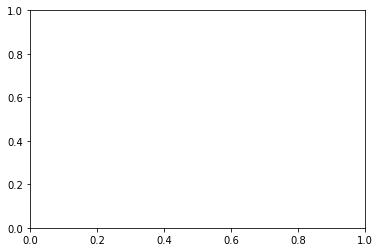

In [255]:
# 과제7
# Q. horsepower를 3개의 bin으로 나누고 bin_names = ['저출력', '보통출력','고출력']으로 출력하세요.
# (np.histogram() 함수로 3개의 bin으로 나눔)
# https://wikidocs.net/23258

import numpy as np
from matplotlib import pyplot as plt

a = auto_mpg.horsepower
a =a.dropna().isnull().sum()

hist, b = np.histogram(a, bins=3)  #도수, 구분 = np.histogram(data, 도수분포구간 (bin))

bin_names = ['저출력','보통출력','고출력']

print(hist) #도수는 도수분포표의 각 구간에 있는 data 수
print(b) #구분은 도수본포 구간


plt.hist(a, bin_names, rwidth = 0.8)
plt.xlabel('Mile', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


# df['hp_div'] = pd.cut(x = df.horsepower, bins = divider, la
                      
                      

# print(df[['horsepower', 'hp_div']].head())